In [1]:
import networkx as nx

In [2]:
# copied from notebook from last time
def rand_walk(A, v, steps):
    """Given graph correspoding to adj matrix A
    (represented as numpy array) and
    starting vertex v, traverse
    the graph by choosing an edge randomly from
    the possible choices at each vertex."""
    w = v # current vertex
    for n in range(steps):       
        num_vert = len(A[w]) # number of vertices total
        neigh_list = [i for i in range(num_vert) if A[w,i]==1]
        # above is list of neighbors of w 
        
        num_neigh = len(neigh_list) 

        # choose an edge randomly, make this the new w
        w = neigh_list[randint(0,num_neigh-1)]
    return w

In [3]:
import numpy as np

In [6]:
A=np.array([[0,1,1], [1,0,0], [1,0,0]]); A

array([[0, 1, 1],
       [1, 0, 0],
       [1, 0, 0]])

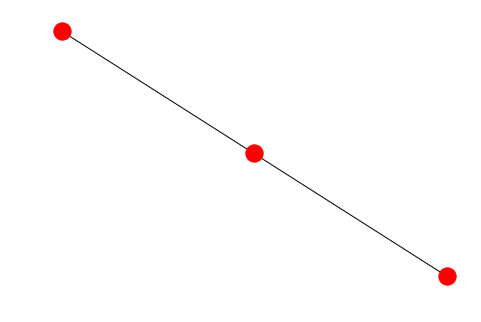

In [10]:
G=nx.Graph(A)
nx.draw(G)

In [27]:
rand_walk(A,0,3)
# random walk on graph given by A, starting at 0, 3 steps
# end at 1 or 2, each with prob=1/2

2

In [ ]:
# Random graphs (eg as models of real world networks)
# Number of vertices V is fixed 
# Edges are chosen randomly, but number E is fixed
# Choose a random pair of different vertices
# and connect them with an edge 
# (if not already connected)
# Keep on doing until we have E edges
# Note: different from model of random graphs
# for project (in that one total number of edges will vary slightly)

In [30]:
def rand_graph(V,E):
    """Generates random graph described above,
    with V vertices and E edges. Returns
    adjacency matrix A."""
    A = np.zeros((V,V)) # initialize to all zeros
    edges_so_far = 0 # counts edges added so far
    while edges_so_far < E:
        i = randint(0,V-1)
        j = randint(0,V-1)
        if (i != j and A[i,j] == 0):
            # above tests whether i,j are different
            # and no edge already between them
            A[i,j] = 1  # add edge between i,j
            A[j,i] = 1  # keep adjacency matrix symmetric
            edges_so_far += 1 # increment number of edges added
    return A

In [32]:
A = rand_graph(4,2)
A

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

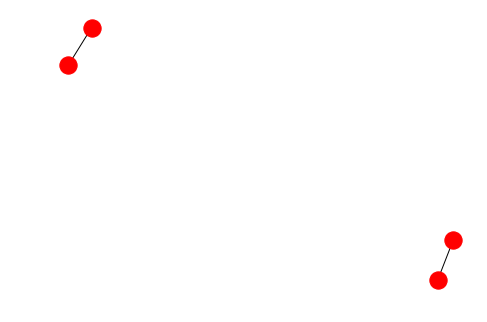

In [34]:
# draw random graph from above
G = nx.Graph(A)
nx.draw(G)

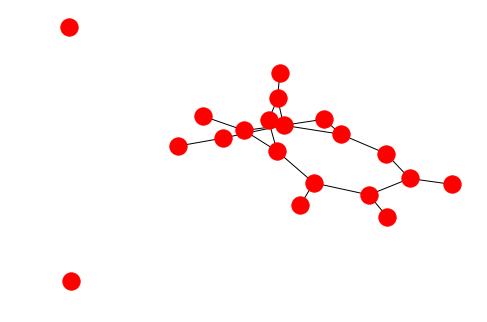

In [44]:
A = rand_graph(20,20)
G = nx.Graph(A)
nx.draw(G)

In [52]:
vertices_hit = [rand_walk(A,0,5) for i in range(100)]
vertices_hit

[6, 2, 12, 16, 12, 17, 2, 2, 6, 19]

In [ ]:
# Q: What is the distribution of degrees of vertices?
# (degree of v is number of neighbors)

In [54]:
def deg_seq(A):
    """Returns list of degrees of vertices
    in graph represented by adj matrix A."""
    # sum(A[w]) equals degree of w
    return [sum(A[w]) for w in range(len(A))]
    # note len(A) is equal to number of rows of A
    # (which equals number of vertices)
    

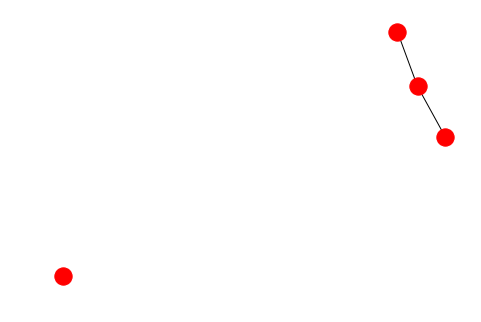

In [57]:
A = rand_graph(4,2)
G = nx.Graph(A)
nx.draw(G)

In [58]:
deg_seq(A)

[1.0, 2.0, 0.0, 1.0]

(array([369., 362., 190.,  61.,  15.,   3.,   0.,   0.,   0.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

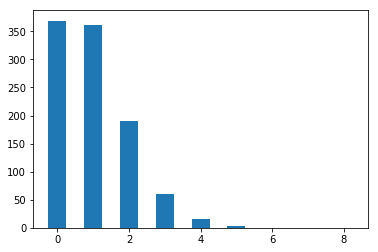

In [64]:
# make histogram of degree sequence
import matplotlib.pyplot as plt
A = rand_graph(1000,500)
plt.hist(deg_seq(A), bins=range(10), align="left", rwidth=0.5)
# this plot should remind you of Poisson dist with intensity lam=1

2.0

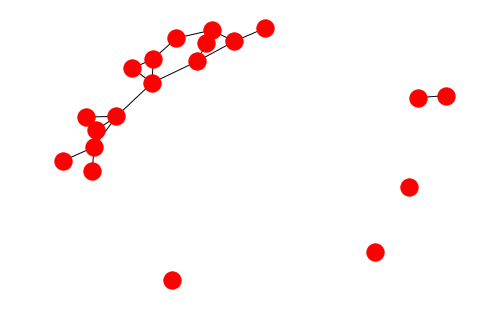

In [69]:
A = rand_graph(20,20)
G = nx.Graph(A)
nx.draw(G)
sum(deg_seq(A))/20 # average degree for this graph
# The average degree is always 2E/V

(array([136., 255., 286., 183.,  93.,  34.,  10.,   2.,   1.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

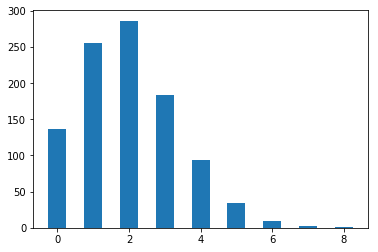

In [75]:
# make histogram again with different V,E
V = 1000
E = 1000
lam = 2*E/V
A = rand_graph(V,E)
deg = deg_seq(A)
plt.hist(deg_seq(A), bins=range(10), align="left", rwidth=0.5)
# looks like Poisson with intensity lam=2

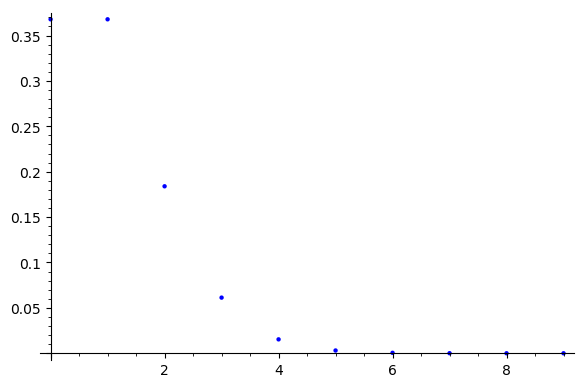

In [81]:
# Make a list plot of the pmf for actual Poisson distributio 
# pmf:  lam^k * exp(-lam)/factorial(k)
lam=1
list_plot([lam^k * exp(-lam)/factorial(k) for k in range(10)])

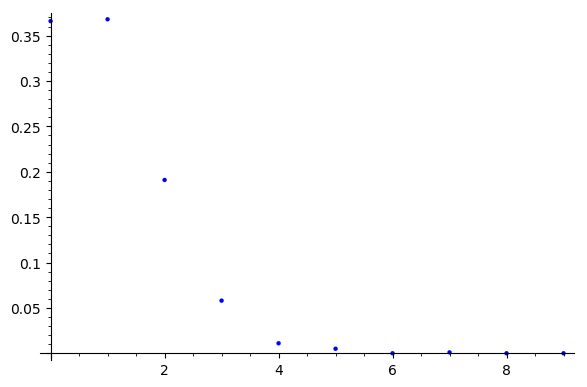

In [93]:
# Want to compare degree seq to Poisson
# with intensity lam = 2E/V
# Below will make list_plot of degree sequence, which 
# we will plot on same graph as Poisson pmf next class
V = 1000
E = 500
lam = 2*E/V
A = rand_graph(V,E)
deg = deg_seq(A)
deg_table = np.zeros(E)
# deg_table[i] will be num of vertices with deg=i
#print(deg)
for d in deg:
    deg_table[int(d)] += 1/V
#print(deg_table)
list_plot(deg_table[0:10])